### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó négyzetes y-ok generálása

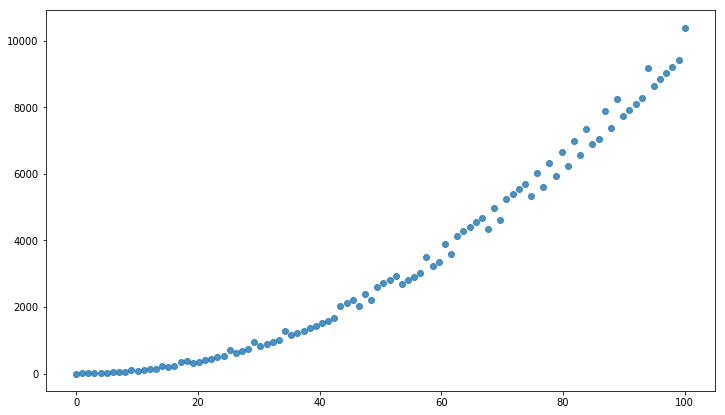

In [2]:
X = np.linspace(start=0, stop=100, num=100)
y = []
for i in range(100):
    rnd = np.random.randint(0, 2)
    if(rnd == 0):
        y.append(X[i]**2 + i**(1.3))
    else:
        y.append(X[i]**2 - i**(1.3))
        
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből X^2-ek készítése - power_X

LinregressResult(slope=0.9897955854528909, intercept=8.687684541247108, rvalue=0.9976676363268517, pvalue=4.5068027889321616e-116, stderr=0.006840791308334157)

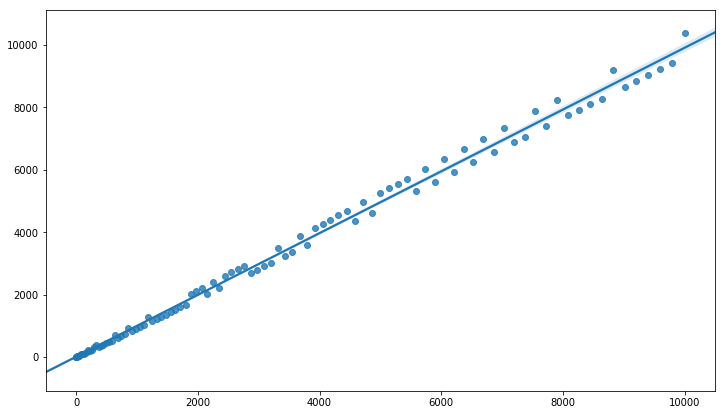

In [12]:
kitevő = 2
power_X = X**kitevő

plt.figure(figsize=(12, 7))
sns.regplot(x=power_X, y=y)

egyenes = stats.linregress(X**kitevő, y)
b0 = egyenes.intercept
b1 = egyenes.slope
stats.linregress(X**2, y)

### X^2, y-hoz tartozó egyenes együtthatói

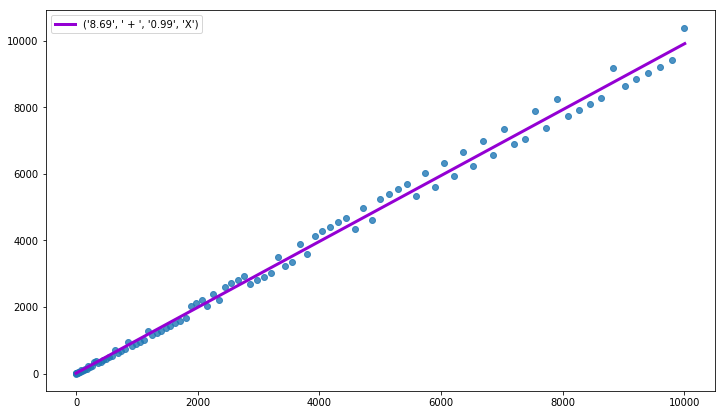

In [13]:
plt.figure(figsize=(12, 7))
plt.scatter(X**kitevő, y, alpha=0.8)

vonal_x = np.linspace(np.min(X**kitevő)-1, np.max(X**kitevő)+5, 2)
vonal_y = (b0 + b1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3, label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
plt.legend()

### Hatvány görbe ábrázolása Y = B0 + (B1*X^2)

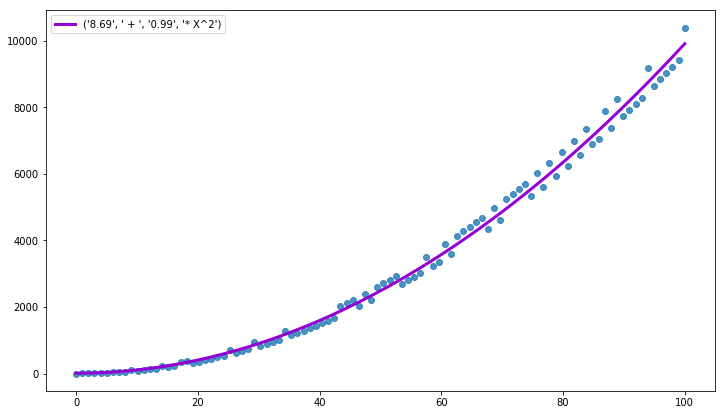

In [14]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

plt.plot(X, b0 + b1*(X**kitevő), c='darkviolet', linewidth=3, label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), '* X^2'))
plt.legend()

### Prediction

In [15]:
def power_predict(x):
    return b0 + b1*(x**kitevő)

power_predict(45)

2013.0237450833513

### R^2

In [16]:
from sklearn.metrics import r2_score

ypower_predicted = list(map(power_predict, X))
print('R^2: ', r2_score(y, ypower_predicted))

R^2:  0.9953407125740071
